# Name : Anant Pandey
# MTech AI
# Roll No : R005
# Assignment 6


**Uploading files to Google Colab**

In [1]:
from google.colab import files

uploaded = files.upload()

# Environment Note - 
**The following are the steps only for running the notebook in a Google Colab Environment**

In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


**Downloading the Dataset from Kaggle**

# About the dataset

Link : https://www.kaggle.com/datasets/mfekadu/darpa-timit-acousticphonetic-continuous-speech


The TIMIT corpus of read speech has been designed to provide speech data for the acquisition of acoustic-phonetic knowledge and for the development and evaluation of automatic speech recognition systems. TIMIT has resulted from the joint efforts of several sites under sponsorship from the Defense Advanced Research Projects Agency - Information Science and Technology Office (DARPA-ISTO). Text corpus design was a joint effort among the Massachusetts Institute of Technology (MIT), Stanford Research Institute (SRI), and Texas Instruments (TI). The speech was recorded at TI, transcribed at MIT, and has been maintained, verified, and prepared for CD-ROM production by the National Institute of Standards and Technology (NIST). This file contains a brief description of the TIMIT Speech Corpus. Additional information including the referenced material and some relevant reprints of articles may be found in the printed documentation which is also available from NTIS (NTIS# PB91-100354).

In [3]:
!kaggle datasets download -d mfekadu/darpa-timit-acousticphonetic-continuous-speech

darpa-timit-acousticphonetic-continuous-speech.zip: Skipping, found more recently modified local copy (use --force to force download)


**Unzipping the downloaded dataset**

In [4]:
!unzip -qq *.zip

replace PHONCODE.DOC? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
A


**Getting rid of pesky warnings**

In [5]:
!pip install shutup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import shutup; shutup.please()

In [7]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.utils.vis_utils import plot_model
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()
import glob,tqdm,re,os
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
from scipy.spatial.distance import cityblock
from tensorflow.keras.layers import Embedding
import os

import warnings
warnings.filterwarnings("ignore")

In [8]:
dataframe = pd.read_csv("train_data.csv")

In [9]:
dataframe.head()

,index,test_or_train,dialect_region,speaker_id,filename,path_from_data_dir,path_from_data_dir_windows,is_converted_audio,is_audio,is_word_file,is_phonetic_file,is_sentence_file
0,1.0,TRAIN,DR4,MMDM0,SI681.WAV.wav,TRAIN/DR4/MMDM0/SI681.WAV.wav,TRAIN\\DR4\\MMDM0\\SI681.WAV.wav,True,True,False,False,False
1,2.0,TRAIN,DR4,MMDM0,SI1311.PHN,TRAIN/DR4/MMDM0/SI1311.PHN,TRAIN\\DR4\\MMDM0\\SI1311.PHN,False,False,False,True,False
2,3.0,TRAIN,DR4,MMDM0,SI1311.WRD,TRAIN/DR4/MMDM0/SI1311.WRD,TRAIN\\DR4\\MMDM0\\SI1311.WRD,False,False,True,False,False
3,4.0,TRAIN,DR4,MMDM0,SX321.PHN,TRAIN/DR4/MMDM0/SX321.PHN,TRAIN\\DR4\\MMDM0\\SX321.PHN,False,False,False,True,False
4,5.0,TRAIN,DR4,MMDM0,SX321.WRD,TRAIN/DR4/MMDM0/SX321.WRD,TRAIN\\DR4\\MMDM0\\SX321.WRD,False,False,True,False,False


In [10]:
dataframe["dialect_region"].unique()

array(['DR4', 'DR3', 'DR2', 'DR5', 'DR7', 'DR6', 'DR1', 'DR8', nan],
      dtype=object)

In [11]:
t_d_r=["DR1","DR2"]

In [14]:
train_dataframe=dataframe.loc[dataframe['dialect_region'].isin(t_d_r)]

In [15]:
train_dataframe['dialect_region'].unique()

array(['DR2', 'DR1'], dtype=object)

In [16]:
train_dataframe.drop("path_from_data_dir_windows",axis=1,inplace=True)

In [17]:
train_dataframe.head().T

,7200,7201,7202,7203,7204
index,7201.0,7202.0,7203.0,7204.0,7205.0
test_or_train,TRAIN,TRAIN,TRAIN,TRAIN,TRAIN
dialect_region,DR2,DR2,DR2,DR2,DR2
speaker_id,FJKL0,FJKL0,FJKL0,FJKL0,FJKL0
filename,SX32.PHN,SX212.WAV.wav,SX32.WRD,SI932.WRD,SX302.TXT
path_from_data_dir,TRAIN/DR2/FJKL0/SX32.PHN,TRAIN/DR2/FJKL0/SX212.WAV.wav,TRAIN/DR2/FJKL0/SX32.WRD,TRAIN/DR2/FJKL0/SI932.WRD,TRAIN/DR2/FJKL0/SX302.TXT
is_converted_audio,False,True,False,False,False
is_audio,False,True,False,False,False
is_word_file,False,False,True,True,False
is_phonetic_file,True,False,False,False,False


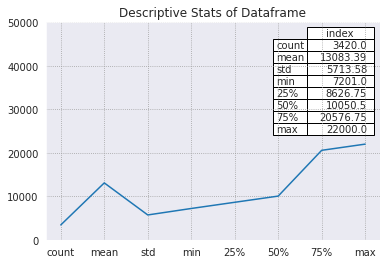

<Figure size 9000x9000 with 0 Axes>

In [116]:
from pandas.plotting import table
from matplotlib.pyplot import figure
fig,ax = plt.subplots(1,1)
ax.set_ylim([0,50000])
plt.title("Descriptive Stats of Dataframe")
figure(figsize = (30,30),dpi = 300)
table(ax,np.round(train_dataframe.describe(),2),loc = "upper right",colWidths = [0.2,0.2,0.2])
train_dataframe.describe().plot(ax=ax,legend = None)

**Count Plot for checking Dialect Regions**

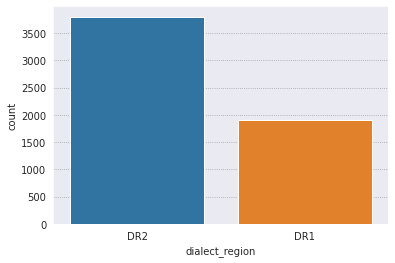

In [18]:
sns.countplot(x = 'dialect_region',data = train_dataframe)

**Count Plot for checking if file is an Phonetic file or not**

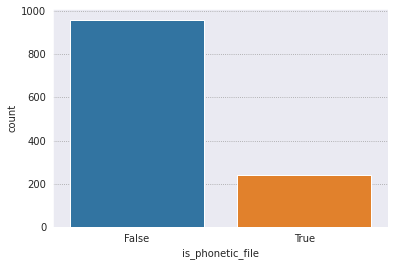

In [19]:
sns.countplot(x = 'is_phonetic_file',data = train_dataframe)

**Plotting KDE for Dialects among regions**

Text(0.5, 1.0, 'Distributions of Dialects in regions')

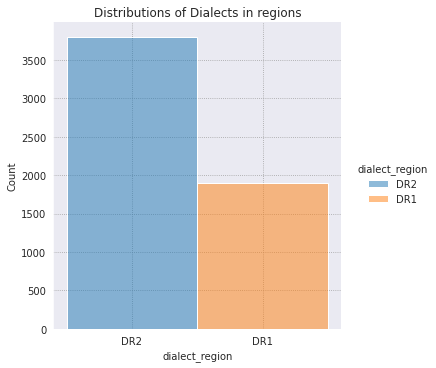

In [20]:
sns.displot(train_dataframe,x = "dialect_region",kde = True,hue = 'dialect_region')
plt.title("Distributions of Dialects in regions")

In [21]:
test_dataframe=dataframe.loc[dataframe['dialect_region']=="DR3"]

In [22]:
train_dataframe["FType"]=train_dataframe["path_from_data_dir"].str.split('.')

In [23]:
def extract_FType(l):
  return l[-1]

In [24]:
train_dataframe["FType"]=train_dataframe["FType"].apply(lambda x:extract_FType(x) )

In [25]:
train_dataframe["FType"]

7200     PHN
7201     wav
7202     WRD
7203     WRD
7204     TXT
        ... 
21995    WRD
21996    WAV
21997    WAV
21998    TXT
21999    TXT
Name: FType, Length: 5700, dtype: object

In [26]:
ftypes=["PHN","WRD","TXT"]
train_dataframe=train_dataframe.loc[train_dataframe['FType'].isin(ftypes)]

In [27]:
train_dataframe.head().T

,7200,7202,7203,7204,7205
index,7201.0,7203.0,7204.0,7205.0,7206.0
test_or_train,TRAIN,TRAIN,TRAIN,TRAIN,TRAIN
dialect_region,DR2,DR2,DR2,DR2,DR2
speaker_id,FJKL0,FJKL0,FJKL0,FJKL0,FJKL0
filename,SX32.PHN,SX32.WRD,SI932.WRD,SX302.TXT,SX122.WRD
path_from_data_dir,TRAIN/DR2/FJKL0/SX32.PHN,TRAIN/DR2/FJKL0/SX32.WRD,TRAIN/DR2/FJKL0/SI932.WRD,TRAIN/DR2/FJKL0/SX302.TXT,TRAIN/DR2/FJKL0/SX122.WRD
is_converted_audio,False,False,False,False,False
is_audio,False,False,False,False,False
is_word_file,False,True,True,False,True
is_phonetic_file,True,False,False,False,False


In [28]:
train_dataframe.describe()

,index
count,3420.000000
mean,13083.385088
std,5713.580338
min,7201.000000
25%,8626.750000
50%,10050.500000
75%,20576.750000
max,22000.000000


In [29]:
train_dataframe["path_from_data_dir"]="/content/data/"+train_dataframe["path_from_data_dir"]

In [30]:
train_dataframe.head().T

,7200,7202,7203,7204,7205
index,7201.0,7203.0,7204.0,7205.0,7206.0
test_or_train,TRAIN,TRAIN,TRAIN,TRAIN,TRAIN
dialect_region,DR2,DR2,DR2,DR2,DR2
speaker_id,FJKL0,FJKL0,FJKL0,FJKL0,FJKL0
filename,SX32.PHN,SX32.WRD,SI932.WRD,SX302.TXT,SX122.WRD
path_from_data_dir,/content/data/TRAIN/DR2/FJKL0/SX32.PHN,/content/data/TRAIN/DR2/FJKL0/SX32.WRD,/content/data/TRAIN/DR2/FJKL0/SI932.WRD,/content/data/TRAIN/DR2/FJKL0/SX302.TXT,/content/data/TRAIN/DR2/FJKL0/SX122.WRD
is_converted_audio,False,False,False,False,False
is_audio,False,False,False,False,False
is_word_file,False,True,True,False,True
is_phonetic_file,True,False,False,False,False


In [31]:
train_dataframe["path_from_data_dir"].values[0].split('.')[0]

'/content/data/TRAIN/DR2/FJKL0/SX32'

In [32]:
def words(dir):
  w=[]
  phn = []
  dir=dir.split('.')[0]
  dict_file_wrd = open(str(dir+".WRD"), 'r')
  dict_file_phn = open(str(dir+".PHN"), 'r')
  with dict_file_wrd as f:
    phonics = [line.rstrip('\n') for line in f]
    for p in phonics:
      p=p.split(' ')
      s="".join(p[2:])
      w.append(s)
  with dict_file_phn as f:
    phonics = [line.rstrip('\n') for line in f]
    for p in phonics:
      p=p.split(' ')
      s="".join(p[2:])
      phn.append(s)
  return w,phn

In [33]:
train_dataframe["path_from_data_dir"].values[0]

'/content/data/TRAIN/DR2/FJKL0/SX32.PHN'

In [34]:
len(train_dataframe["path_from_data_dir"])

3420

In [35]:
w=[]
p=[]
for l in train_dataframe["path_from_data_dir"]:
  wp,ph=words(l)
  w.append(wp)
  p.append(ph)

In [36]:
len(p),len(w)

(3420, 3420)

In [37]:
data = pd.DataFrame({'Word': w, 'Phonics': p})
data.head()

,Word,Phonics
0,"[it's, fun, to, roast, marshmallows, on, a, ga...","[h#, ix, tcl, s, f, ah, n, d, axr, r, ow, s, t..."
1,"[it's, fun, to, roast, marshmallows, on, a, ga...","[h#, ix, tcl, s, f, ah, n, d, axr, r, ow, s, t..."
2,"[his, prescription, hot, and, cold, compresses...","[h#, hh, ih, z, pcl, p, axr, s, kcl, k, r, ih,..."
3,"[tofu, is, made, from, processed, soybeans]","[h#, t, ow, f, uw, ih, z, m, ey, dcl, f, r, em..."
4,"[encyclopedias, seldom, present, anecdotal, ev...","[h#, q, ix, n, s, ay, kcl, k, l, ix, pcl, p, i..."


In [38]:
def joiner(w):
  return " ".join(w)

In [39]:
data_fin = data["Word"].apply(lambda x:joiner(x))

In [40]:
data_fin

0          it's fun to roast marshmallows on a gas burner
1          it's fun to roast marshmallows on a gas burner
2       his prescription hot and cold compresses to in...
3                    tofu is made from processed soybeans
4         encyclopedias seldom present anecdotal evidence
                              ...                        
3415                  most young rise early every morning
3416                    clasp the screw in your left hand
3417                    clasp the screw in your left hand
3418                 the two artists exchanged autographs
3419    in simpler terms it amounts to pointing the pl...
Name: Word, Length: 3420, dtype: object

In [41]:
data_fin.columns=["Words"]

In [42]:
data_fin_ph=data["Phonics"].apply(lambda x:joiner(x))

In [43]:
data_fin=pd.DataFrame(list(zip(data_fin,data_fin_ph)),columns=["Words","Phonemes"])

In [44]:
data_fin.head().T

,0,1,2,3,4
Words,it's fun to roast marshmallows on a gas burner,it's fun to roast marshmallows on a gas burner,his prescription hot and cold compresses to in...,tofu is made from processed soybeans,encyclopedias seldom present anecdotal evidence
Phonemes,h# ix tcl s f ah n d axr r ow s tcl t m aa r s...,h# ix tcl s f ah n d axr r ow s tcl t m aa r s...,h# hh ih z pcl p axr s kcl k r ih pcl sh ix n ...,h# t ow f uw ih z m ey dcl f r em pcl p r aa s...,h# q ix n s ay kcl k l ix pcl p iy dcl d iy ix...


In [45]:
data.values[10]

array([list(['a', 'young', 'mouse', 'scampered', 'across', 'the', 'field', 'and', 'disappeared']),
       list(['h#', 'q', 'ax', 'y', 'ah', 'ng', 'm', 'aw', 's', 'kcl', 'k', 'ae', 'm', 'pcl', 'p', 'axr', 'dx', 'ix', 'kcl', 'k', 'r', 'aa', 's', 'epi', 'dh', 'ix', 'f', 'iy', 'l', 'dcl', 'd', 'ix', 'n', 'd', 'ih', 's', 'ix', 'pcl', 'p', 'ih', 'axr', 'dcl', 'd', 'h#'])],
      dtype=object)

In [46]:
w=[]
phn = []
dict_file = open(str("TIMITDIC.TXT"), 'r')
with dict_file as f:
  for _ in range(20):
        next(f)
  phonics = [line.rstrip('\n') for line in f]
  for p in phonics:
    temp=p.rstrip('/')
    temp=temp.split(' ')
    w.append(temp[0])
    phn.append(" ".join(temp[1:]).replace("/",""))

In [47]:
w[3],phn[3]

('-ups', ' ah p s')

In [48]:
corpus = pd.DataFrame({'Word': w, 'Phonics': phn})
corpus.head()

,Word,Phonics
0,'em,ax m
1,-knacks,n ae1 k s
2,-upmanship,ah1 p m ax n sh ih p
3,-ups,ah p s
4,-zagged,z ae1 g d


In [49]:
wrd=corpus['Phonics'].loc[corpus['Word']=="-ups"]
print("".join(wrd))

 ah p s


**Creating a Word and a Phoneme Dictionary**

In [50]:
word_dict=[]
phoneme_dict=[]
for d in data_fin["Words"]:
  d="".join(d)
  temp=d.split(' ')
  for t in temp:
      phoneme_dict.append("".join(corpus['Phonics'].loc[corpus['Word']==t]))
      word_dict.append("".join(t))


In [51]:
word_dict

["it's",
 'fun',
 'to',
 'roast',
 'marshmallows',
 'on',
 'a',
 'gas',
 'burner',
 "it's",
 'fun',
 'to',
 'roast',
 'marshmallows',
 'on',
 'a',
 'gas',
 'burner',
 'his',
 'prescription',
 'hot',
 'and',
 'cold',
 'compresses',
 'to',
 'increase',
 'her',
 'absorption',
 'of',
 'water',
 'tofu',
 'is',
 'made',
 'from',
 'processed',
 'soybeans',
 'encyclopedias',
 'seldom',
 'present',
 'anecdotal',
 'evidence',
 'encyclopedias',
 'seldom',
 'present',
 'anecdotal',
 'evidence',
 'his',
 'prescription',
 'hot',
 'and',
 'cold',
 'compresses',
 'to',
 'increase',
 'her',
 'absorption',
 'of',
 'water',
 'but',
 'now',
 'she',
 'looked',
 'ugly',
 'but',
 'now',
 'she',
 'looked',
 'ugly',
 'was',
 'it',
 'a',
 'birthday',
 'ball',
 'a',
 'young',
 'mouse',
 'scampered',
 'across',
 'the',
 'field',
 'and',
 'disappeared',
 'a',
 'young',
 'mouse',
 'scampered',
 'across',
 'the',
 'field',
 'and',
 'disappeared',
 'i',
 'gave',
 'them',
 'several',
 'choices',
 'and',
 'let',
 'them

**Creating a Dataframe by combining Word Dictionary and Phonemes**

In [52]:
data_dict = pd.DataFrame({'Word': word_dict, 'Phonics': phoneme_dict})
data_dict.head()

,Word,Phonics
0,it's,ih1 t s
1,fun,f ah1 n
2,to,t uw1
3,roast,r ow1 s t
4,marshmallows,m aa1 r sh m eh2 l ow z


In [53]:
print("The shape of the dictionary created :",data_dict.shape)

The shape of the dictionary created : (29562, 2)


In [54]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(data['Phonics'].values)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'h#': 2, 'ix': 3, 's': 4, 'n': 5, 'iy': 6, 'tcl': 7, 'r': 8, 'l': 9, 'kcl': 10, 'dcl': 11, 'k': 12, 'ih': 13, 't': 14, 'ae': 15, 'm': 16, 'eh': 17, 'q': 18, 'd': 19, 'z': 20, 'ax': 21, 'axr': 22, 'aa': 23, 'w': 24, 'dh': 25, 'ao': 26, 'pcl': 27, 'p': 28, 'dx': 29, 'ay': 30, 'sh': 31, 'ah': 32, 'f': 33, 'gcl': 34, 'ey': 35, 'ow': 36, 'er': 37, 'b': 38, 'g': 39, 'v': 40, 'bcl': 41, 'ux': 42, 'y': 43, 'epi': 44, 'ng': 45, 'jh': 46, 'hv': 47, 'el': 48, 'nx': 49, 'pau': 50, 'hh': 51, 'ch': 52, 'th': 53, 'aw': 54, 'oy': 55, 'en': 56, 'uw': 57, 'uh': 58, 'ax-h': 59, 'zh': 60, 'em': 61, 'eng': 62}


In [55]:
data_dict = data_dict[~data_dict['Phonics'].str.contains('#')].reset_index(drop=True)
data_dict.sample(10)

,Word,Phonics
3483,the,dh ax
2808,triggered,t r ih1 g axr d
17265,documents,d aa1 k y uw m ax n t s
3797,agency,ey1 jh ix n s iy
11925,a,ax
19781,oily,oy1 l iy
3705,fur,f er1
2289,pronunciation,p r ax n ah2 n s iy ey1 sh ix n
23131,wide,w ay1 d
14206,only,ow1 n l iy


In [56]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(data_dict['Phonics'].values)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 't': 2, 'n': 3, 'r': 4, 's': 5, 'k': 6, 'd': 7, 'ax': 8, 'l': 9, 'ae1': 10, 'ih1': 11, 'm': 12, 'z': 13, 'iy1': 14, 'ao1': 15, 'iy': 16, 'dh': 17, 'w': 18, 'ix': 19, 'p': 20, 'uw1': 21, 'axr': 22, 'aa1': 23, 'hh': 24, 'g': 25, 'eh1': 26, 'b': 27, 'sh': 28, 'f': 29, 'ay1': 30, 'v': 31, 'y': 32, 'ow1': 33, 'ih': 34, 'ah1': 35, 'ey1': 36, 'ng': 37, 'ae': 38, 'uh1': 39, 'jh': 40, 'el': 41, 'er1': 42, 'ch': 43, 'aw1': 44, 'oy1': 45, 'th': 46, 'ey2': 47, 'ae2': 48, 'ih2': 49, 'eh2': 50, 'ay2': 51, 'ow2': 52, 'uw': 53, 'en': 54, 'er': 55, 'ow': 56, 'ah2': 57, 'uw2': 58, 'aa2': 59, 'iy2': 60, 'ao': 61, 'uh': 62, 'ay': 63, 'eh': 64, 'aa': 65, 'zh': 66, 'ao2': 67, 'ey': 68, 'ah': 69, 'oy2': 70, 'er2': 71, 'uh2': 72, 'aw2': 73, 'em': 74, 'aw': 75}


In [57]:
vocab_length = len(tokenizer.word_index) + 1
print("The length of the Vocabulary created :",vocab_length)

The length of the Vocabulary created : 76


In [58]:
sequences = tokenizer.texts_to_sequences(data_dict['Phonics'].values)
print(sequences[:5])

[[11, 2, 5], [29, 35, 3], [2, 21], [4, 33, 5, 2], [12, 23, 4, 28, 12, 50, 9, 56, 13]]


In [59]:
longest_sentence = len(max(sequences, key=len))
print("The number of words in the longest sentence :",longest_sentence)

The number of words in the longest sentence : 14


In [60]:
padded_phonics = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=longest_sentence, padding='post')
print(padded_phonics[:5])

[[11  2  5  0  0  0  0  0  0  0  0  0  0  0]
 [29 35  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 2 21  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4 33  5  2  0  0  0  0  0  0  0  0  0  0]
 [12 23  4 28 12 50  9 56 13  0  0  0  0  0]]


In [61]:
print("The length of dictionary :",len(data_dict['Word'].unique()))

The length of dictionary : 2396


**Setting Optimizer to Nadam**

The Nesterov-accelerated Adaptive Moment Estimation, or the Nadam, algorithm is an extension to the Adaptive Movement Estimation (Adam) optimization algorithm to add Nesterov's Accelerated Gradient (NAG) or Nesterov momentum, which is an improved type of momentum.

**Much like Adam is essentially RMSprop with momentum, Nadam is Adam with Nesterov momentum.**

In [62]:
optimizer = tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")

**Model Compilation**

In [63]:
embedding_dim = 10
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, 
                              input_length=longest_sentence),
    tf.keras.layers.LSTM(256, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(data_dict['Word'].unique()), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 14, 10)            760       
                                                                 
 lstm (LSTM)                 (None, 14, 256)           273408    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 2396)              155740    
                                                                 
Total params: 635,284
Trainable params: 635,284
Non-trainable params: 0
_________________________________________________________________


**Model Visualisation**

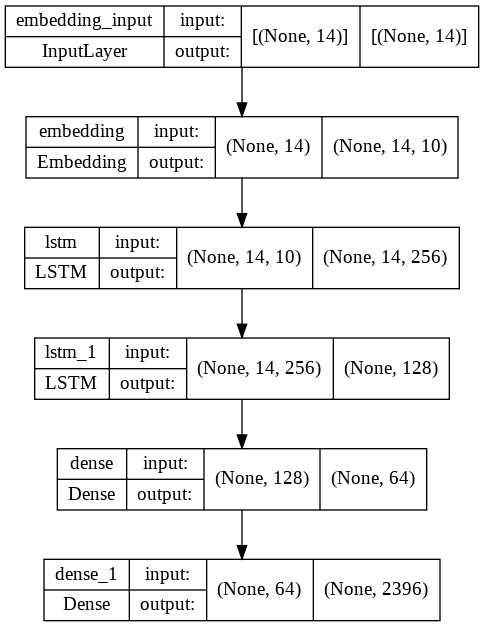

In [64]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [65]:
y = data_dict['Word'].values
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

**Fitting the Model**

In [66]:
history = model.fit(padded_phonics, encoded_y, epochs=100)

Epoch 1/100
924/924 [==============================] - 9s 6ms/step - loss: 6.5335 - accuracy: 0.0400
Epoch 2/100
924/924 [==============================] - 6s 6ms/step - loss: 6.3620 - accuracy: 0.0401
Epoch 3/100
924/924 [==============================] - 6s 6ms/step - loss: 6.3571 - accuracy: 0.0401
Epoch 4/100
924/924 [==============================] - 6s 6ms/step - loss: 6.3539 - accuracy: 0.0401
Epoch 5/100
924/924 [==============================] - 6s 6ms/step - loss: 6.3507 - accuracy: 0.0401
Epoch 6/100
924/924 [==============================] - 5s 6ms/step - loss: 6.3477 - accuracy: 0.0398
Epoch 7/100
924/924 [==============================] - 6s 6ms/step - loss: 6.3445 - accuracy: 0.0401
Epoch 8/100
924/924 [==============================] - 5s 6ms/step - loss: 6.3435 - accuracy: 0.0401
Epoch 9/100
924/924 [==============================] - 5s 6ms/step - loss: 6.3426 - accuracy: 0.0401
Epoch 10/100
924/924 [==============================] - 7s 7ms/step - loss: 6.3425 - accura

**Model Evaluation**

In [67]:
model.evaluate(padded_phonics, encoded_y)

924/924 [==============================] - 5s 5ms/step - loss: 0.0803 - accuracy: 0.9757


[0.08026216179132462, 0.9757459163665771]

In [68]:
sentence="At ambulance departure he is seldom present for the essay he wandered"

In [69]:
word_dict_eval=[]
phoneme_dict_eval=[]
temp=sentence.split(' ')
for t in temp:
    phoneme_dict_eval.append("".join(corpus['Phonics'].loc[corpus['Word']==t]))
    word_dict_eval.append("".join(t))

In [70]:
data_dict_eval = pd.DataFrame({'Word': word_dict_eval, 'Phonics': phoneme_dict_eval})
data_dict_eval.head()

,Word,Phonics
0,At,
1,ambulance,ae1 m b y uh l ax n s
2,departure,d ax p aa1 r ch axr
3,he,hh iy1
4,is,ih1 z


In [71]:
data_dict_eval.head(10)

,Word,Phonics
0,At,
1,ambulance,ae1 m b y uh l ax n s
2,departure,d ax p aa1 r ch axr
3,he,hh iy1
4,is,ih1 z
5,seldom,s eh1 l d ax m
6,present,
7,for,f ao1 r
8,the,dh ax
9,essay,eh1 s ey2


In [72]:
tokenizer_eval = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer_eval.fit_on_texts(data_dict_eval['Phonics'].values)
word_index_eval = tokenizer_eval.word_index
print(word_index_eval)
vocab_length_eval = len(tokenizer_eval.word_index) + 1
print(vocab_length_eval)
sequences_eval = tokenizer_eval.texts_to_sequences(data_dict_eval['Phonics'].values)
print(sequences_eval[:5])
longest_sentence_eval = len(max(sequences_eval, key=len))
longest_sentence_eval
padded_phonics_eval = tf.keras.preprocessing.sequence.pad_sequences(sequences_eval, maxlen=14, padding='post')
print(padded_phonics_eval[:5])

{'<OOV>': 1, 'ax': 2, 'd': 3, 's': 4, 'm': 5, 'l': 6, 'n': 7, 'aa1': 8, 'r': 9, 'axr': 10, 'hh': 11, 'iy1': 12, 'eh1': 13, 'ae1': 14, 'b': 15, 'y': 16, 'uh': 17, 'p': 18, 'ch': 19, 'ih1': 20, 'z': 21, 'f': 22, 'ao1': 23, 'dh': 24, 'ey2': 25, 'w': 26}
27
[[], [14, 5, 15, 16, 17, 6, 2, 7, 4], [3, 2, 18, 8, 9, 19, 10], [11, 12], [20, 21]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  5 15 16 17  6  2  7  4  0  0  0  0  0]
 [ 3  2 18  8  9 19 10  0  0  0  0  0  0  0]
 [11 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [20 21  0  0  0  0  0  0  0  0  0  0  0  0]]


In [73]:
padded_phonics_eval

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [14,  5, 15, 16, 17,  6,  2,  7,  4,  0,  0,  0,  0,  0],
       [ 3,  2, 18,  8,  9, 19, 10,  0,  0,  0,  0,  0,  0,  0],
       [11, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [20, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4, 13,  6,  3,  2,  5,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [22, 23,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [24,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13,  4, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [11, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [26,  8,  7,  3, 10,  3,  0,  0,  0,  0,  0,  0,  0,  0]],
      dtype=int32)

In [74]:
padded_phonics_eval[6].reshape(1,-1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [75]:
predictions=model.predict(padded_phonics_eval)

In [76]:
predictions

array([[0.0000000e+00, 1.3801530e-38, 0.0000000e+00, ..., 6.2326251e-07,
        6.2153820e-09, 3.7225542e-05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.9261205e-32, 1.0353840e-15],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.3284520e-18, 2.8715764e-19],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.3819417e-04,
        0.0000000e+00, 4.9699979e-13],
       [5.9777456e-03, 2.0952989e-10, 3.4448195e-21, ..., 2.4122060e-19,
        6.0016752e-23, 3.5029068e-25],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [77]:
predictions=np.argmax(predictions, axis=1)

In [78]:
word_predictions = encoder.inverse_transform(predictions)

In [79]:
print("The following are the word predictions :",word_predictions)

The following are the word predictions : ['use' 'existed' 'viscosity' 'yet' 'up' 'vanquished' 'use' 'before' 'who'
 'high' 'yet' 'alcoves']


# Implementation using Time Steps

Time steps are a way of examining and analyzing your data through specified time intervals. Using three parameters, time interval, time step repeat interval, and reference time, you can specify the time steps you are interested in analyzing:

*  **Time step interval** — The duration of the step you are interested in analyzing
*  **Time step repeat interval** — How frequently you measure the time step interval
* **Reference time** — Where in time to align the time step interval and time step repeat to, with time steps continuing both forward and backward from the reference time

In [80]:
w = pd.read_csv("data/TRAIN/DR1/FCJF0/SA1.WRD",sep=' ',header=None)
p = pd.read_csv("data/TRAIN/DR1/FCJF0/SA1.PHN",sep=' ',header=None)

In [81]:
w.head()

,0,1,2
0,3050,5723,she
1,5723,10337,had
2,9190,11517,your
3,11517,16334,dark
4,16334,21199,suit


In [82]:
p.head()

,0,1,2
0,0,3050,h#
1,3050,4559,sh
2,4559,5723,ix
3,5723,6642,hv
4,6642,8772,eh


In [83]:
dialects = ['DR1','DR2','DR3']
wds = []
for d in dialects:
    word_paths = glob.glob(f'data/TRAIN/{d}/*/*.WRD', recursive = True)
    for word_path in tqdm(word_paths):
        s_pattern = re.findall("\/[A-Z0-9]+\/[A-Z0-9]+.WRD",word_path)[0].split(".")[0]
        pattern = re.findall("[A-Z0-9]+.WRD",word_path)[0].split(".")[0]
        s_path = re.findall(".+\/",word_path)[0]
        p_path = os.path.join(s_path,pattern+'.PHN')
        words = pd.read_csv(word_path,sep=' ',header=None)
        phs = pd.read_csv(p_path,sep=' ',header=None)
        words['dialect'] = [d]*len(words)
        words['speaker'] = [s_pattern]*len(words)
        for index,record in words.iterrows():
            ph = ' '.join(phs[(phs[0]>=record[0]) & (phs[1]<=record[1])][2].tolist())
            words.loc[index,'phoneme'] = ph
        wds.append(words)

100%|██████████| 760/760 [00:09<00:00, 78.61it/s]


In [84]:
data = pd.concat(wds)
data.reset_index(drop=True,inplace=True)
data.columns = ['s','e','word','dialect','speaker','phoneme']
data.head()

,s,e,word,dialect,speaker,phoneme
0,11028,13869,don't,DR1,/MTJS0/SA2,d ow nx
1,13869,19000,ask,DR1,/MTJS0/SA2,ae s kcl
2,19000,20600,me,DR1,/MTJS0/SA2,m iy
3,20600,22023,to,DR1,/MTJS0/SA2,dx ix
4,22023,28532,carry,DR1,/MTJS0/SA2,kcl k ae r iy


In [85]:
train = set(data[data['dialect'].isin(['DR1','DR2'])]['word'].tolist())
val = set(data[data['dialect']=='DR3']['word'].tolist())

**Label encoding the data**

In [86]:
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['word'])

In [87]:
train = data[data['dialect'].isin(['DR1','DR2'])][['phoneme','word','label']]
train = train.sample(frac=1).reset_index(drop=True)
val = data[data['dialect']=='DR3'].reset_index(drop=True)[['phoneme','word','label']]

In [88]:
phonemes = data['phoneme'].tolist()
tokenizer = Tokenizer(oov_token='OOV')
tokenizer.fit_on_texts(phonemes)
vocab_size = len(tokenizer.word_index) + 1

In [89]:
seq = train['phoneme'].values
train_sequences = tokenizer.texts_to_sequences(train['phoneme'].values)
val_sequences = tokenizer.texts_to_sequences(val['phoneme'].values)
max_length = len(max(sequences, key=len))

**Defining training and validation sets**

In [90]:
X_train = pad_sequences(train_sequences, maxlen=max_length, padding='post')
X_val = pad_sequences(val_sequences, maxlen=max_length, padding='post')
y_train = train['label'].values
y_val = val['label'].values

**Model Compilation**

In [91]:
embedding_dim = 10
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, 
                              input_length=max_length),
    tf.keras.layers.LSTM(256, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(data['label'].nunique(), activation='softmax')
])
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 14, 10)            620       
                                                                 
 lstm (LSTM)                 (None, 14, 256)           273408    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3094)              201110    
                                                                 
Total params: 680,514
Trainable params: 680,514
Non-trainable params: 0
_________________________________________________________________


**Model Visualisation**

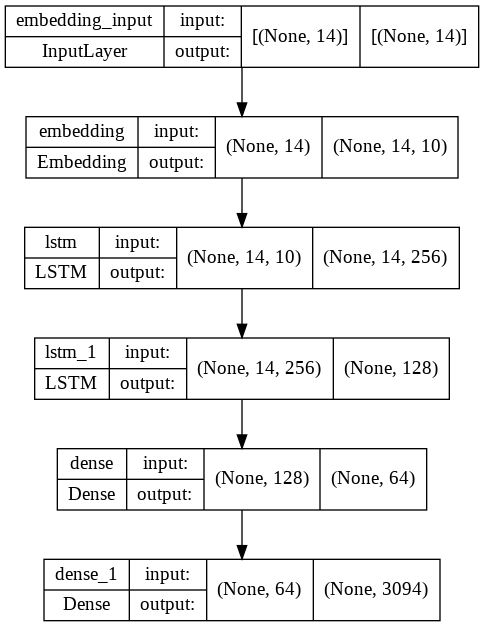

In [92]:
plot_model(model, show_shapes=True, show_layer_names=True)

**Fitting the Model**

In [93]:
history = model.fit(X_train,y_train,
                    batch_size=16,
                    epochs=100,
                    validation_data=(X_val,y_val),
                    validation_batch_size=32)

Epoch 1/100
616/616 [==============================] - 12s 13ms/step - loss: 6.6443 - accuracy: 0.0383 - val_loss: 6.0765 - val_accuracy: 0.0762
Epoch 2/100
616/616 [==============================] - 7s 11ms/step - loss: 5.5217 - accuracy: 0.1253 - val_loss: 5.2685 - val_accuracy: 0.1979
Epoch 3/100
616/616 [==============================] - 7s 11ms/step - loss: 4.6992 - accuracy: 0.2268 - val_loss: 4.8752 - val_accuracy: 0.2532
Epoch 4/100
616/616 [==============================] - 7s 11ms/step - loss: 4.1314 - accuracy: 0.3233 - val_loss: 4.6425 - val_accuracy: 0.3570
Epoch 5/100
616/616 [==============================] - 7s 11ms/step - loss: 3.7273 - accuracy: 0.3710 - val_loss: 4.4354 - val_accuracy: 0.3921
Epoch 6/100
616/616 [==============================] - 5s 9ms/step - loss: 3.3869 - accuracy: 0.3988 - val_loss: 4.3458 - val_accuracy: 0.4053
Epoch 7/100
616/616 [==============================] - 6s 9ms/step - loss: 3.1085 - accuracy: 0.4211 - val_loss: 4.2151 - val_accuracy: 

**Model Evaluation**

In [94]:
model.evaluate(X_val,y_val)

208/208 [==============================] - 1s 4ms/step - loss: 6.6719 - accuracy: 0.7070


[6.671870708465576, 0.7070006132125854]

In [95]:
statements = []
for speaker in tqdm(data['speaker'].unique()):
    sentence = " ".join(data[data['speaker']==speaker]['word'].tolist())
    phoneme = "  ".join(data[data['speaker']==speaker]['phoneme'].tolist())
    statements.append([speaker,sentence,phoneme])

100%|██████████| 1900/1900 [00:05<00:00, 344.73it/s]


In [96]:
df = pd.DataFrame(statements,columns=['speaker','sentence','phonemes'])
df.head().T

,0,1,2,3,4
speaker,/MTJS0/SA2,/MTJS0/SX292,/MTJS0/SI1822,/MTJS0/SX112,/MTJS0/SI562
sentence,don't ask me to carry an oily rag like that,these exclusive documents must be locked up at...,but to the infuriation of scientists for no kn...,tugboats are capable of hauling huge loads,family loyalties and cooperative work have bee...
phonemes,d ow nx ae s kcl m iy dx ix kcl k ae r iy ...,dh iy z ix kcl k s kcl k l uw s ax v dcl d a...,b ah tcl t ih dh iy ix n f y er r iy ey sh ...,t ah gcl b ow tcl s ix kcl k ey pcl p ax bcl...,f ae m l iy l oy el tcl t iy z ix ng kcl k ...


**Defining a custom predictions function**

In [97]:
def predictions(sentence):
    phonemes = sentence.split("  ")
    w_s = ""
    for p in phonemes:
        text_seq = tokenizer.texts_to_sequences([p])
        text_padded = pad_sequences(text_seq, maxlen=max_length, padding='post')
        pred = model.predict(text_padded)
        pred = np.argmax(pred,axis=1)
        word = encoder.classes_[pred[0]]
        w_s = w_s + word + " "
    w_s = w_s.strip()
    return w_s

**Applying the prediction function**

In [98]:
df['predictions'] = df['phonemes'].progress_apply(predictions)

  0%|          | 0/1900 [00:00<?, ?it/s]

In [99]:
df = pd.merge(df,data[['speaker','dialect']].drop_duplicates(),how='left',left_on='speaker',right_on='speaker')

In [100]:
df.head().T

,0,1,2,3,4
speaker,/MTJS0/SA2,/MTJS0/SX292,/MTJS0/SI1822,/MTJS0/SX112,/MTJS0/SI562
sentence,don't ask me to carry an oily rag like that,these exclusive documents must be locked up at...,but to the infuriation of scientists for no kn...,tugboats are capable of hauling huge loads,family loyalties and cooperative work have bee...
phonemes,d ow nx ae s kcl m iy dx ix kcl k ae r iy ...,dh iy z ix kcl k s kcl k l uw s ax v dcl d a...,b ah tcl t ih dh iy ix n f y er r iy ey sh ...,t ah gcl b ow tcl s ix kcl k ey pcl p ax bcl...,f ae m l iy l oy el tcl t iy z ix ng kcl k ...
predictions,don't ask me to carry an oily rag like that,these exclusive documents must be locked up it...,but to the infuriation of scientists for no kn...,tugboats a capable of hauling huge loads,family loyalties in cooperative work have been...
dialect,DR1,DR1,DR1,DR1,DR1


In [101]:
sentences = df['sentence'].tolist() + df['predictions'].tolist()
tokenizer = Tokenizer(oov_token='OOV')
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1

In [102]:
print(f'Vocabulary Size is {vocab_size}')

Vocabulary Size is 3096


**Defining 3 functions**

1. Function to check Manhattan distances between 2 functions
2. Function to check Total distance between 2 words
3. Function to check distance between 2 sentences

In [103]:
def word_to_word(w1,w2):
    x1 = np.array(tokenizer.texts_to_sequences([w1])[0])
    x2 = np.array(tokenizer.texts_to_sequences([w2])[0])
    word_vector = Embedding(vocab_size, 16, input_length=1)
    v1 = word_vector(x1)
    v2 = word_vector(x2)
    distance = cityblock(v1,v2)
    return round(distance,2)

def sentence_total(sent1,sent2):
    total_dist = 0
    for word1,word2 in zip(sent1.split(),sent2.split()):
        total_dist+=word_to_word(word1,word2)
    return total_dist

def sentence_to_sentence(sent1,sent2):
    dist = ""
    for word1,word2 in zip(sent1.split(),sent2.split()):
        dist+=str(word_to_word(word1,word2))+','
    dist = dist.strip(",")
    return dist

In [104]:
df['wd'] = df.progress_apply(lambda x: sentence_to_sentence(x['sentence'],x['predictions']),axis=1)
df['total_wd'] = df.progress_apply(lambda x: sentence_total(x['sentence'],x['predictions']),axis=1)

  0%|          | 0/1900 [00:00<?, ?it/s]

  0%|          | 0/1900 [00:00<?, ?it/s]

In [105]:
df.head().T

,0,1,2,3,4
speaker,/MTJS0/SA2,/MTJS0/SX292,/MTJS0/SI1822,/MTJS0/SX112,/MTJS0/SI562
sentence,don't ask me to carry an oily rag like that,these exclusive documents must be locked up at...,but to the infuriation of scientists for no kn...,tugboats are capable of hauling huge loads,family loyalties and cooperative work have bee...
phonemes,d ow nx ae s kcl m iy dx ix kcl k ae r iy ...,dh iy z ix kcl k s kcl k l uw s ax v dcl d a...,b ah tcl t ih dh iy ix n f y er r iy ey sh ...,t ah gcl b ow tcl s ix kcl k ey pcl p ax bcl...,f ae m l iy l oy el tcl t iy z ix ng kcl k ...
predictions,don't ask me to carry an oily rag like that,these exclusive documents must be locked up it...,but to the infuriation of scientists for no kn...,tugboats a capable of hauling huge loads,family loyalties in cooperative work have been...
dialect,DR1,DR1,DR1,DR1,DR1
wd,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.72,0.0,0.0","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.0,0.62,0.0,0.0,0.0,0.0,0.0","0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0"
total_wd,0.0,0.49,0.69,0.52,0.38


**Plotting Histogram for Word Sentence Distribution amongst Dialects 1 and 2**



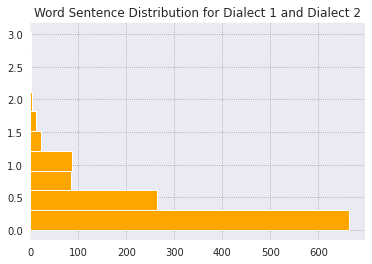

In [106]:
plt.hist(df[df['dialect'].isin(['DR1','DR2'])]['total_wd'],orientation='horizontal',color='orange')
plt.title("Word Sentence Distribution for Dialect 1 and Dialect 2")
plt.show()

**Plotting Histogram for Total Word Sentence Distribution amongst Dialect 3**


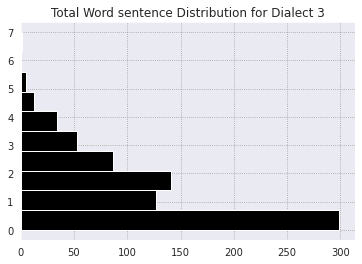

In [107]:
plt.hist(df[df['dialect'].isin(['DR3'])]['total_wd'],orientation='horizontal',color='black')
plt.title("Total Word sentence Distribution for Dialect 3")
plt.show()

**Plotting a KDE for Distributions among Dialects**

Text(0.5, 1.0, 'Distributions among Dialects')

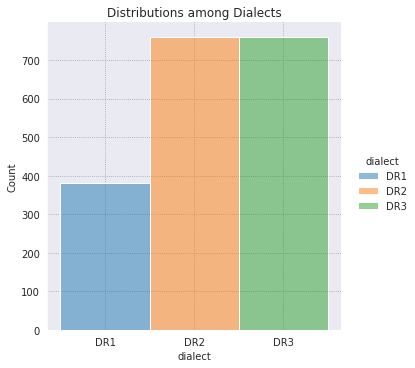

In [108]:
sns.displot(df,x = "dialect",kde = True,hue = 'dialect')
plt.title("Distributions among Dialects")

**Printing a list of the Actuals and Predicted and their Word Distributions**

In [109]:
for i in range(6):
    print(f"Actual: ",df.iloc[i].sentence)
    print(f"\nPredicted: ",df.iloc[i].predictions)
    print(f"\nWord Dist: ",df.iloc[i].wd)
    print("\n")

Actual:  don't ask me to carry an oily rag like that

Predicted:  don't ask me to carry an oily rag like that

Word Dist:  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Actual:  these exclusive documents must be locked up at all times

Predicted:  these exclusive documents must be locked up it all times

Word Dist:  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.72,0.0,0.0


Actual:  but to the infuriation of scientists for no known reason not all of them did

Predicted:  but to the infuriation of scientists for no known reason not all a them did

Word Dist:  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.0


Actual:  tugboats are capable of hauling huge loads

Predicted:  tugboats a capable of hauling huge loads

Word Dist:  0.0,0.62,0.0,0.0,0.0,0.0,0.0


Actual:  family loyalties and cooperative work have been unbroken for generations

Predicted:  family loyalties in cooperative work have been unbroken for generations

Word Dist:  0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Actual:  so of cours

**Printing a list of the Actuals and Predicted and their Word Distributions**

In [110]:
for i in range(6):
    print(f"Actual: ",df[df['dialect']=='DR3'].iloc[i].sentence)
    print(f"\nPredicted: ",df[df['dialect']=='DR3'].iloc[i].predictions)
    print(f"\nWord Dist: ",df[df['dialect']=='DR3'].iloc[i].wd)
    print("\n")

Actual:  don't ask me to carry an oily rag like that

Predicted:  don't ask me to carry an oily rag like that

Word Dist:  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Actual:  why the hell didn't you come out when you saw them gang up on me

Predicted:  why the have divorced you come out when you saw them get up on me

Word Dist:  0.0,0.0,0.52,0.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0


Actual:  the overweight charmer could slip poison into anyone's tea

Predicted:  the overweight charmer kid slip poison into anyone's to

Word Dist:  0.0,0.0,0.0,0.62,0.0,0.0,0.0,0.0,0.46


Actual:  cliff's display was misplaced on the screen

Predicted:  cliff's display was airplanes on a screen

Word Dist:  0.0,0.0,0.0,0.44,0.0,0.51,0.0


Actual:  they remained lifelong friends and companions

Predicted:  they remained ample fenced an experiments

Word Dist:  0.0,0.0,0.53,0.38,0.41,0.57


Actual:  the frightened child was gently subdued by his big brother

Predicted:  the please bike was angrily 